# Bit Plane Splicing

In [140]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

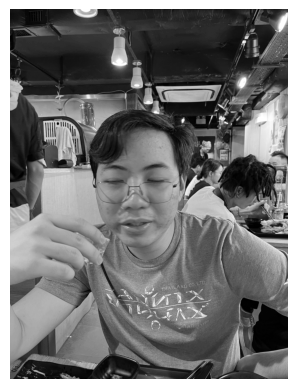

Shape: (4032, 3024)


In [126]:
PATH = "../image processing/image.png"
image = cv2.imread(PATH, 0)

plt.imshow(image, cmap = "gray")
plt.axis("off")
plt.show()

original_shape = image.shape
print("Shape:", original_shape)

## Splitting Image into Bit Planes

In [127]:
# split image into 8 bit planes
bit_planes = []
for i in range(8):
    bit_planes.append(image % 2)
    image = image // 2

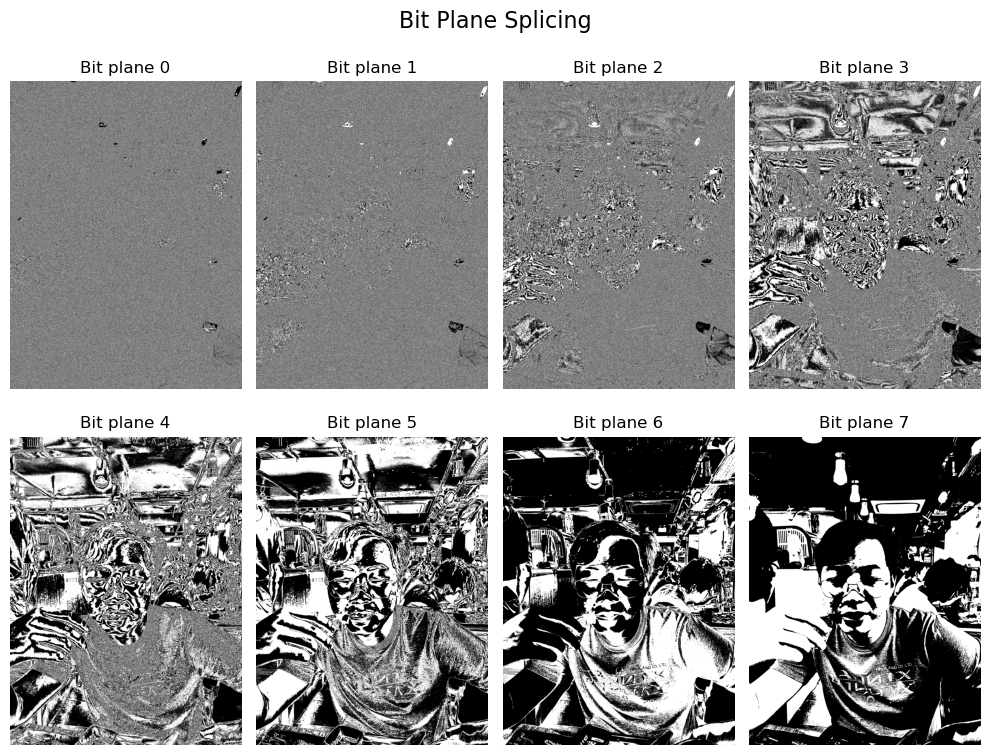

In [128]:
# plot bit planes
fig, axes = plt.subplots(2, 4, figsize=(10, 8))
fig.suptitle("Bit Plane Splicing", fontsize = 16)
for i in range(8):
    axes[i//4, i%4].imshow(bit_planes[i], cmap="gray")
    axes[i//4, i%4].set_title("Bit plane {}".format(i))
    axes[i//4, i%4].axis("off")

plt.tight_layout()
plt.show()


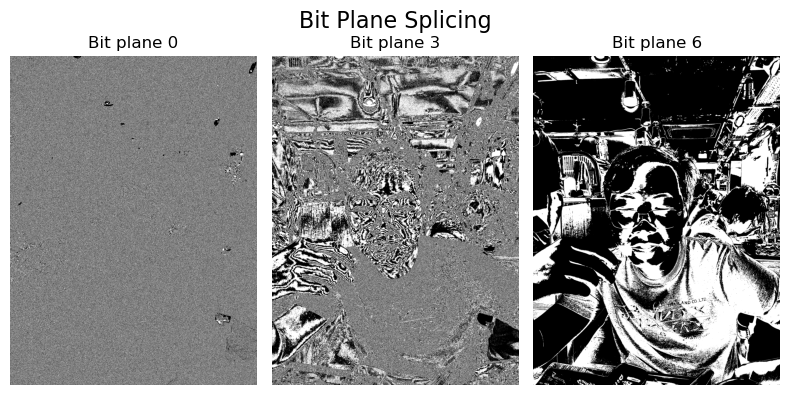

In [129]:
fig, axes = plt.subplots(1, 3, figsize = (8, 4))
fig.suptitle("Bit Plane Splicing", fontsize = 16)
for i in range(3):
    axes[i].imshow(bit_planes[3*i], cmap = "gray")
    axes[i].set_title("Bit plane {}".format(3*i))
    axes[i].axis("off")
plt.tight_layout()
plt.show()

# Digital Watermark

In [130]:
PATH_NEW = "../image processing/sam.png"
new_image = cv2.imread(PATH_NEW, 0)
print("Shape:", image.shape)

Shape: (4032, 3024)


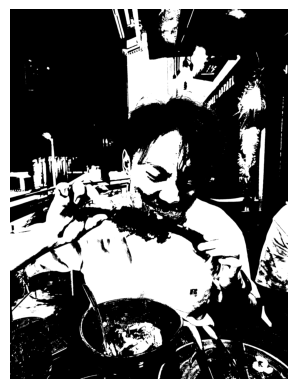

In [131]:
# normalize image to 0-1 and convert to binary
new_image = new_image / 255
new_image[new_image >= 0.5] = 1
new_image[new_image < 0.5] = 0
new_image = new_image.astype(np.uint8)

plt.imshow(new_image, cmap = "gray")
plt.axis("off")
plt.show()

In [132]:
# assign new image to bit plane 0
print("Mean Before:", np.mean(bit_planes[0]))
bit_planes[0] = new_image
print("Mean After:", np.mean(bit_planes[0]))

Mean Before: 0.49837214978584027
Mean After: 0.3164402865698749


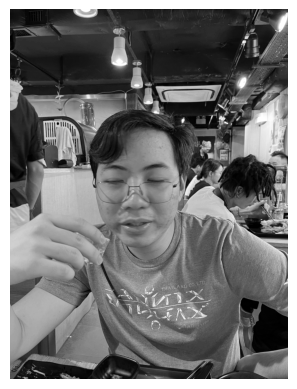

In [133]:
# reconstruct image from bit planes
reconstructed_image = np.zeros(original_shape, dtype = np.uint8)
for i in range(8):
    reconstructed_image += bit_planes[i] * 2**i

plt.imshow(reconstructed_image, cmap = "gray")
plt.axis("off")
plt.show()

## Image Compression

In [134]:
PATH = "../image processing/image.png"
image = cv2.imread(PATH, 0)

bit_planes = []
for i in range(8):
    bit_planes.append(image % 2)
    image = image // 2

In [135]:
compressed = []
for i in range(8):
    compressed_image = np.zeros(original_shape, dtype = np.uint8)
    for j in range(i, 8):
        compressed_image += bit_planes[j] * 2**j
    compressed.append(compressed_image)

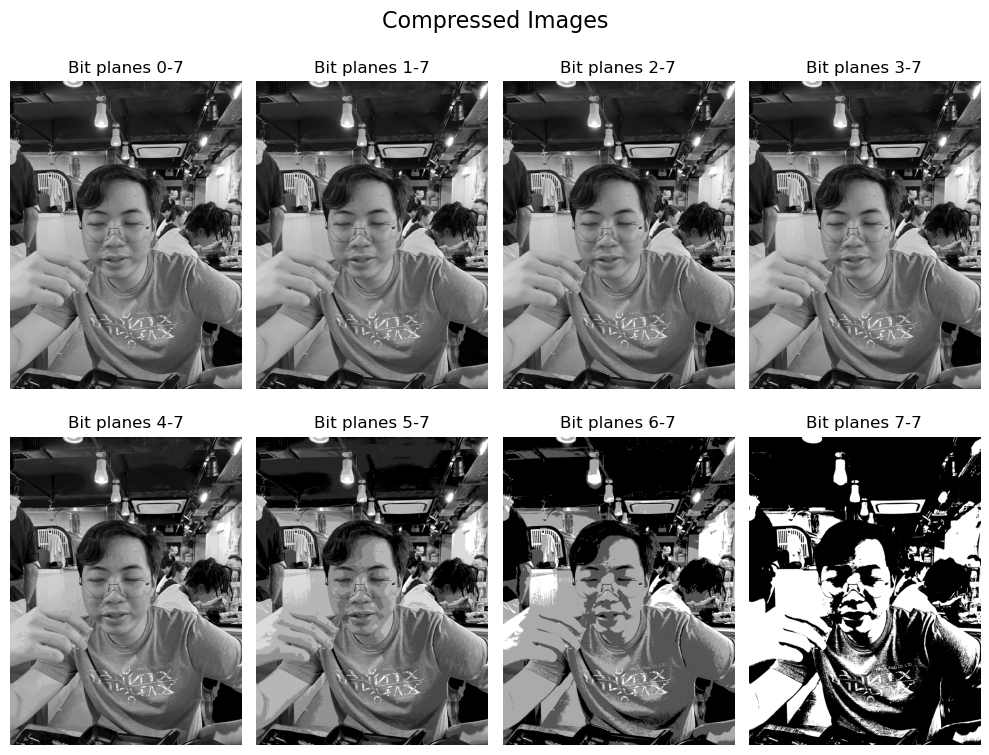

In [136]:
# plot bit planes
fig, axes = plt.subplots(2, 4, figsize=(10, 8))
fig.suptitle("Compressed Images", fontsize = 16)
for i in range(8):
    axes[i//4, i%4].imshow(compressed[i], cmap="gray")
    axes[i//4, i%4].set_title("Bit planes {}-7".format(i))
    axes[i//4, i%4].axis("off")

plt.tight_layout()
plt.show()

In [143]:
# save image
cv2.imwrite("bit_plane_all.png", compressed[0])
cv2.imwrite("bit_plane_compressed.png", compressed[4])

original_size = os.path.getsize("bit_plane_all.png")
compressed_size = os.path.getsize("bit_plane_compressed.png")
print("Size of original:", original_size)
print("Size of compressed:", compressed_size)
print("Compression ratio:", original_size / compressed_size)

Size of original: 6128962
Size of compressed: 1701051
Compression ratio: 3.6030442355931713
